# Lab Work 1: Housing Price Prediction

## Data Analysis
This section involves exploring and examining the dataset given. Features of the dataset will be determined.

### Data Loading

In [2]:
# Importing popular data science libraries
import pandas as pd # for data manipulation and analysis
import numpy as np #  for working with arrays - has functions working with linear algebra, fourier transform and matrices
import matplotlib.pyplot as plt # creating static, animated and interactive visualizations in Python
import seaborn as sns # provides high-level interface for drawing attractive and informative statistical graphics

In [3]:
# Loading data into a dataframe
data = pd.read_csv("house-pricing.csv")

In [4]:
# Viewing data using data
data # can also use data.head() or data.tail() to view this same table

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Data Exploration

In [5]:
# Running data.info() to look for missing values and examine types of features available in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

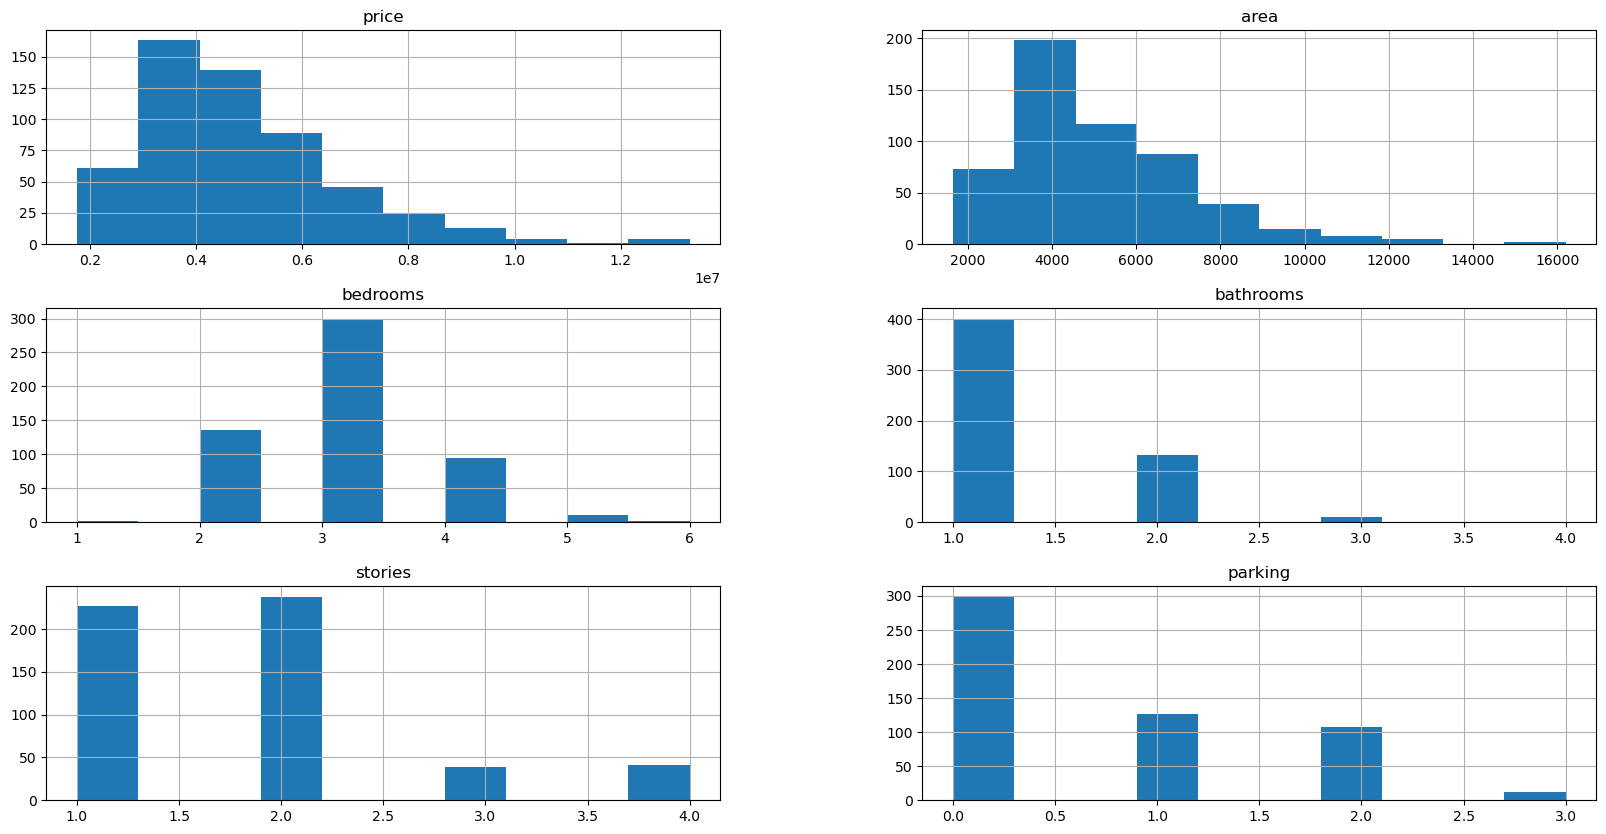

In [6]:
# Creating a histogram of all the features for a more graphical representation of the dataset
data.hist(figsize=(20,10))

C:\Users\kryxo\AppData\Local\Temp\ipykernel_18528\160648649.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

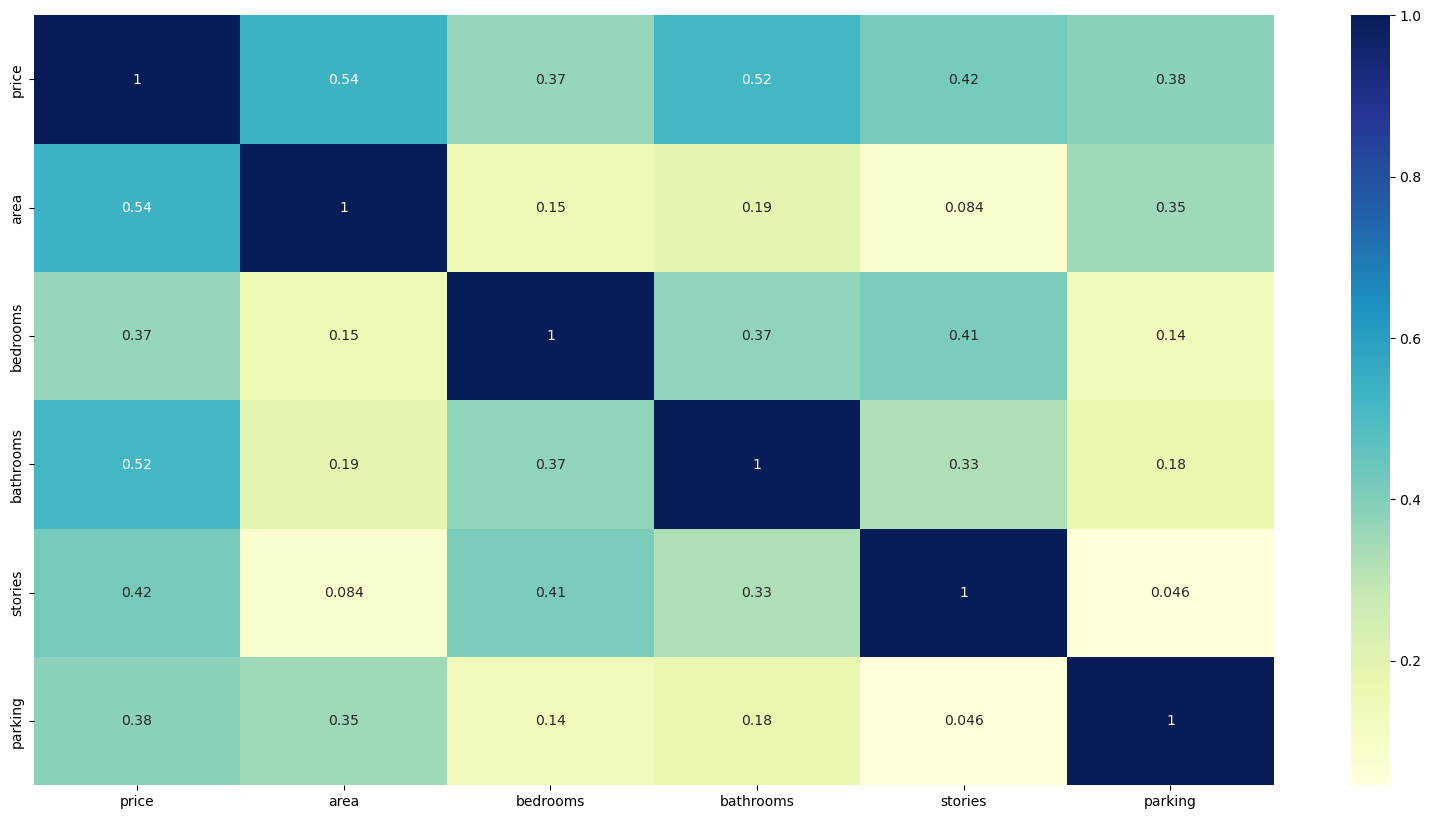

In [7]:
# Determining the correlation of default values
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

## Data Preprocessing
This section involves handling categorical features as well as the normalization/standardization of numerical features

### Handling categorical features
In this section, the categorical features are studied upon and split into binary features that have either a '0' or '1' value, 0 indicating false and 1 indicating true.

In [8]:
# Previewing general information regarding the categorical values
print(data.mainroad.value_counts())
print(data.guestroom.value_counts())
print(data.basement.value_counts())
print(data.hotwaterheating.value_counts())
print(data.airconditioning.value_counts())
print(data.prefarea.value_counts())
print(data.furnishingstatus.value_counts())

yes    468
no      77
Name: mainroad, dtype: int64
no     448
yes     97
Name: guestroom, dtype: int64
no     354
yes    191
Name: basement, dtype: int64
no     520
yes     25
Name: hotwaterheating, dtype: int64
no     373
yes    172
Name: airconditioning, dtype: int64
no     417
yes    128
Name: prefarea, dtype: int64
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


In [9]:
# Replacing the yes/no values with 1/0 respectively
data = data.replace('yes',1)
data = data.replace('no',0)

In [10]:
# Splitting furnishingstatus into different features with binary values
data = data.join(pd.get_dummies(data.furnishingstatus)).drop(['furnishingstatus'], axis=1)

In [11]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [12]:
# Summarizing changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
 12  furnished        545 non-null    uint8
 13  semi-furnished   545 non-null    uint8
 14  unfurnished      545 non-null    uint8
dtypes: int64(12), uint8(3)
memory usage: 52.8 KB


<Axes: >

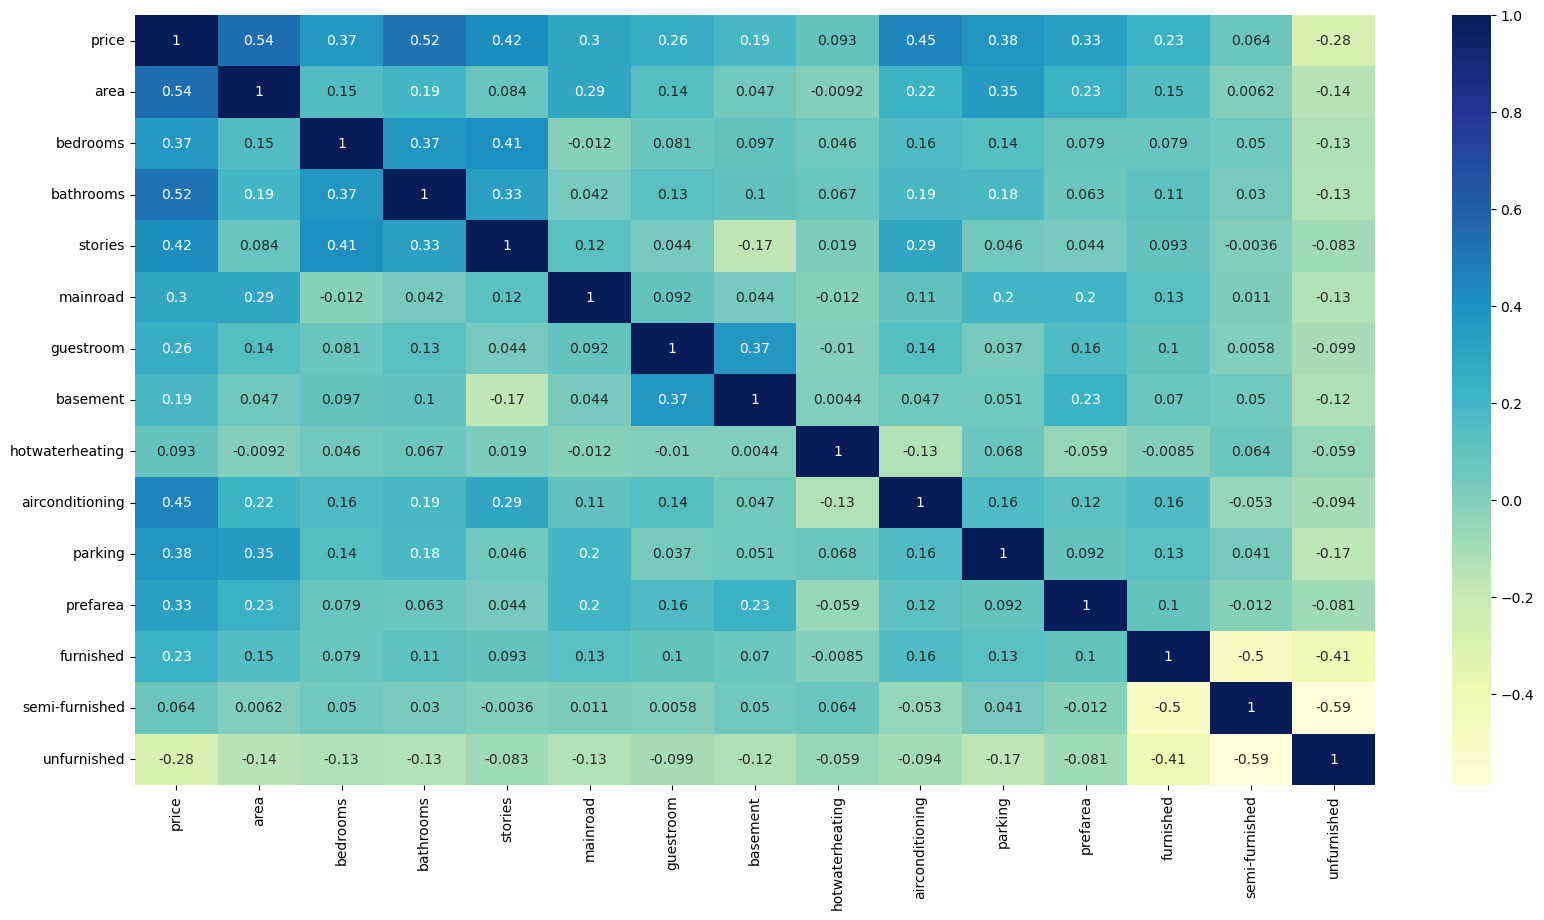

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

### Splitting datasets into train and test sets

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop(['price'], axis=1)
Y = data['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
train_data = X_train.join(Y_train)
test_data = X_test.join(Y_test)

### Normalizing data values

In [16]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.fit_transform(X_test)

### Standardizing data values

In [24]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_train)

# Regression Model Development

## Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

### Training and evaluating model using normalized dataset

In [34]:
linear_reg.fit(X_train_norm, Y_train)
linear_reg.score(X_test_norm, Y_test)

0.5985847865964151

### Training and evaluating model using standardized dataset

In [35]:
linear_reg.fit(X_train_std, Y_train)

LinearRegression()

In [36]:
linear_reg.score(X_test_std, Y_train)

0.6767171906019472